### **Exploring the Dataset**

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
import pandas as pd


df = pd.read_csv("MSFT.csv")
print(df.head())
print(df.describe())

# Display the data types of each column
print(df.dtypes)


        Date        Open        High         Low       Close   Adj Close  \
0  7/26/2023  341.440002  344.670013  333.109985  337.769989  335.148224   
1  7/27/2023  340.480011  341.329987  329.049988  330.720001  328.152954   
2  7/28/2023  333.670013  340.010010  333.170013  338.369995  335.743561   
3  7/31/2023  336.920013  337.700012  333.359985  335.920013  333.312622   
4   8/1/2023  335.190002  338.540009  333.700012  336.339996  333.729340   

     Volume  
0  58383700  
1  39635300  
2  28484900  
3  25446000  
4  18311900  
             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   385.536825  388.498533  382.188928  385.535239  384.381482   
std     42.957304   43.037525   42.766822   43.118428   43.794938   
min    310.989990  314.299988  309.450012  312.140015  310.372955   
25%    338.447502  339.870011  333.312492  337.654991  335.337372   
50%    396.710007  400.274994  393.544998  39

In [ ]:
print(df.isna().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
import seaborn as sns

### **Spotting and Removing the Outliers**

<Axes: ylabel='Volume'>

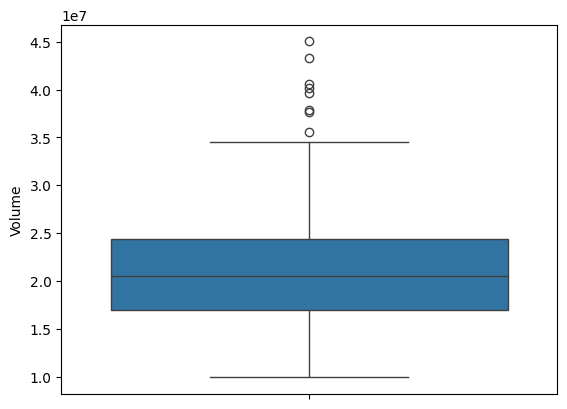

In [ ]:
sns.boxplot(df_new['Volume'])

In [ ]:
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create a single Boolean mask for all outliers
outlier_mask = (df['Volume'] >= upper) | (df['Volume'] <= lower)

# Removing all outliers at once
df = df[~outlier_mask]


<Axes: ylabel='Volume'>

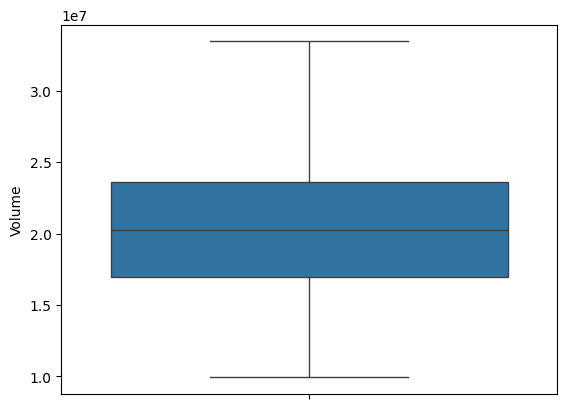

In [ ]:
sns.boxplot(df['Volume'])

### **Training the Model**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
features = ['Open','Low','High','Volume']
target = ['Close']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

### **Prediction Results**

In [ ]:
import matplotlib.pyplot as plt

          Date      Actual   Predicted
0    11/9/2023  360.690002  363.181671
1    5/16/2024  420.989990  424.216302
2     5/3/2024  406.660004  406.461383
3    8/10/2023  322.929993  323.988026
4    2/12/2024  415.260010  416.499326
5    1/16/2024  390.269989  389.376585
6    7/17/2024  443.519989  442.282703
7   12/20/2023  370.619995  372.561536
8    3/19/2024  421.410004  419.612637
9    8/18/2023  316.480011  315.291056
10   7/12/2024  453.549988  453.701356
11  10/18/2023  330.109985  331.663892
12   5/20/2024  425.339996  425.859433
13   9/11/2023  337.940002  337.282946
14    7/8/2024  466.239990  466.814183
15   3/13/2024  415.100006  413.228218
16   8/24/2023  319.970001  321.962308
17   1/19/2024  398.670013  396.733129
18   7/15/2024  453.959991  455.717426
19   8/31/2023  327.760010  328.952098
20   7/11/2024  454.700012  455.091285
21   8/11/2023  321.010010  321.562370
22  12/22/2023  374.579987  374.845332
23   3/27/2024  421.429993  420.657110
24    6/7/2024  423.85000

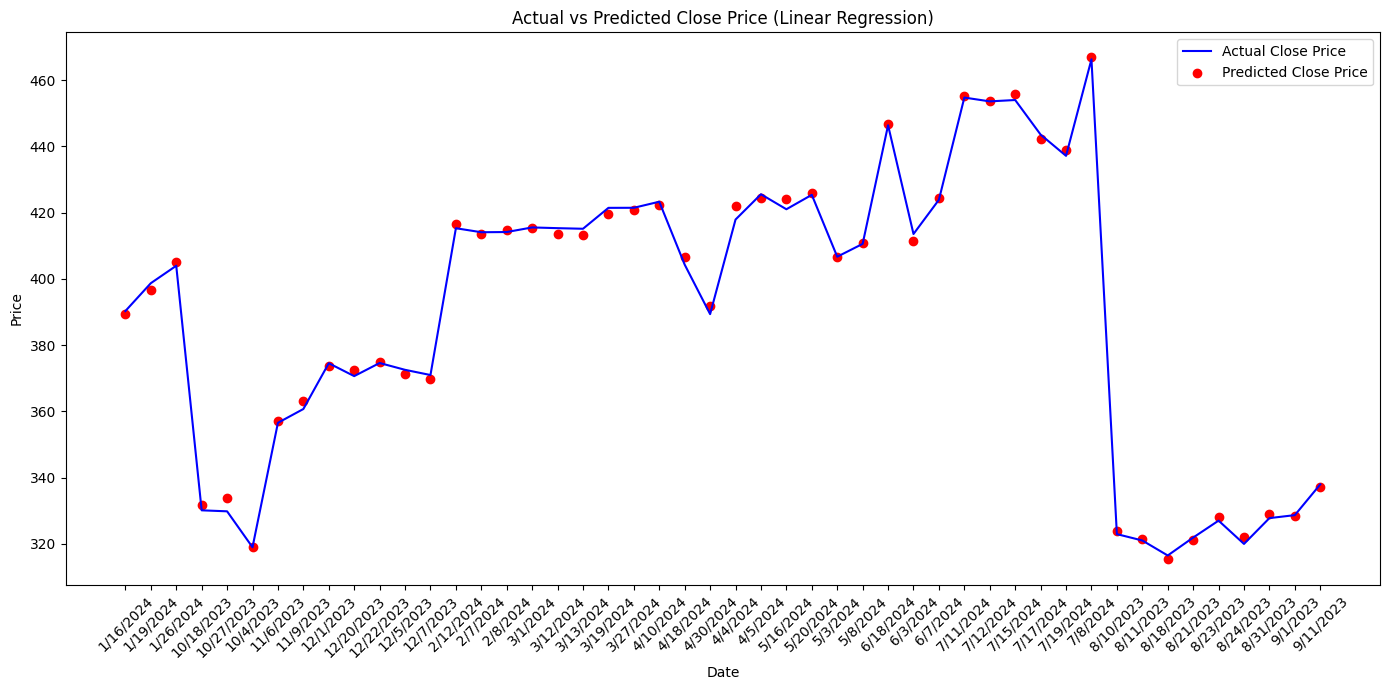

In [ ]:
# Flatten y_test.values to ensure it's 1D
y_test_flattened = y_test.values.flatten()

# Flatten y_pred to ensure it's 1D
y_pred_flattened = y_pred.flatten()

# Create the results DataFrame
results = pd.DataFrame({
    'Date': df.loc[y_test.index, 'Date'].values,
    'Actual': y_test_flattened,
    'Predicted': y_pred_flattened
})

print(results)

# Sorting the results by Date for better visualization
results = results.sort_values('Date').reset_index(drop=True)

# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Close Price', color='blue')
plt.scatter(results['Date'], results['Predicted'], label='Predicted Close Price', color='red')

# Adding titles and labels
plt.title('Actual vs Predicted Close Price (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Formatting the date axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


### **Evaluating the Results**

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

2.423973652107016


In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9987698720926845


In [ ]:
!pip install joblib
import joblib # Make sure to import the joblib library

joblib.dump(model, 'Regression_model.pkl')

['Regression_model.pkl']

### **Financial Stock Indicators**

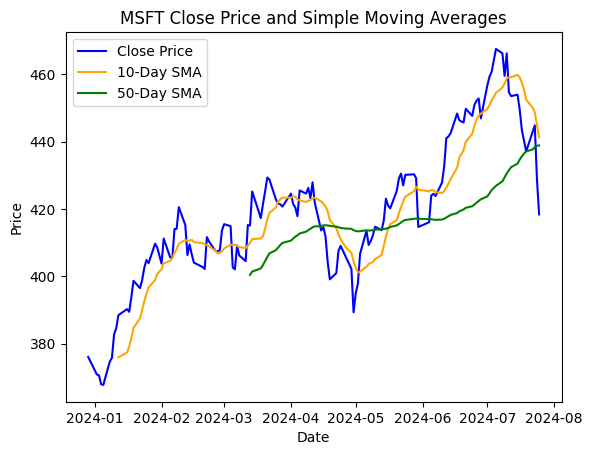

In [ ]:


# Convert 'Date' column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].sort_values()


# Compute Simple Moving Averages (SMA)
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Plotting the closing prices and SMAs

plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['SMA_10'], label='10-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA', color='green')

# Adding titles and labels
plt.title('MSFT Close Price and Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()



# Display the plot
plt.show()


In [ ]:
def compute_rsi(data,window):
  delta = data.diff()
  gain = delta.where(delta > 0,0).rolling(window = window).mean()
  loss = -delta.where(delta < 0,0).rolling(window = window).mean()
  rs = gain / loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

In [ ]:
df['rsi'] = compute_rsi(df['Close'],14)
df.dropna(inplace=True)

In [ ]:
print(df)

          Date        Open        High         Low       Close   Adj Close  \
99  2023-12-29  376.000000  377.160004  373.480011  376.040009  374.670074   
100 2024-01-02  373.859985  375.899994  366.769989  370.869995  369.518921   
101 2024-01-03  369.010010  373.260010  368.510010  370.600006  369.249908   
102 2024-01-04  370.670013  373.100006  367.170013  367.940002  366.599579   
103 2024-01-05  368.970001  372.059998  366.500000  367.750000  366.410278   
..         ...         ...         ...         ...         ...         ...   
232 2024-07-19  433.100006  441.140015  432.000000  437.109985  437.109985   
233 2024-07-22  441.790009  444.600006  438.910004  442.940002  442.940002   
234 2024-07-23  443.899994  448.390015  443.100006  444.850006  444.850006   
235 2024-07-24  440.450012  441.480011  427.589996  428.899994  428.899994   
236 2024-07-25  428.799988  429.799988  417.510010  418.399994  418.399994   

       Volume       SMA_5      SMA_10      SMA_20      SMA_50  

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import ParameterGrid,GridSearchCV
param_grid = {
    'n_estimators': [50,100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [ ]:
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_rf, y_train_rf)

best_param = grid_search.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = best_rf_model.predict(X_test_rf)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
mse = mean_squared_error(y_test_rf, y_pred_rf)
r2 = r2_score(y_test_rf, y_pred_rf)

print("Random Forest Mean Squared Error:", mse)
print("Random Forest R^2 Score:", r2)

Random Forest Mean Squared Error: 6.4786203336412544
Random Forest R^2 Score: 0.9772254202613487


In [ ]:
joblib.dump(best_rf_model, 'RandomForest_model.pkl')

['RandomForest_model.pkl']

         Date      Actual   Predicted
0  2024-01-05  367.750000  369.797402
1  2024-01-18  393.869995  393.358099
2  2024-01-24  402.559998  403.044849
3  2024-01-26  403.929993  405.329496
4  2024-01-29  409.720001  407.035698
5  2024-02-08  414.109985  415.340299
6  2024-02-09  420.549988  417.085755
7  2024-02-15  406.559998  407.155347
8  2024-02-23  410.339996  413.606748
9  2024-03-04  414.920013  415.668099
10 2024-03-07  409.140015  405.947848
11 2024-03-25  422.859985  424.589500
12 2024-04-05  425.519989  423.593350
13 2024-04-08  424.589996  427.024897
14 2024-04-10  423.260010  421.637397
15 2024-04-11  427.929993  424.274050
16 2024-04-18  404.269989  406.553147
17 2024-04-23  407.570007  405.794200
18 2024-05-07  409.339996  413.684600
19 2024-05-08  410.540009  408.966552
20 2024-05-13  413.720001  414.186348
21 2024-06-06  424.519989  422.166297
22 2024-06-07  423.850006  425.208148
23 2024-06-12  441.059998  439.314793
24 2024-06-13  441.579987  443.038150
25 2024-06-1

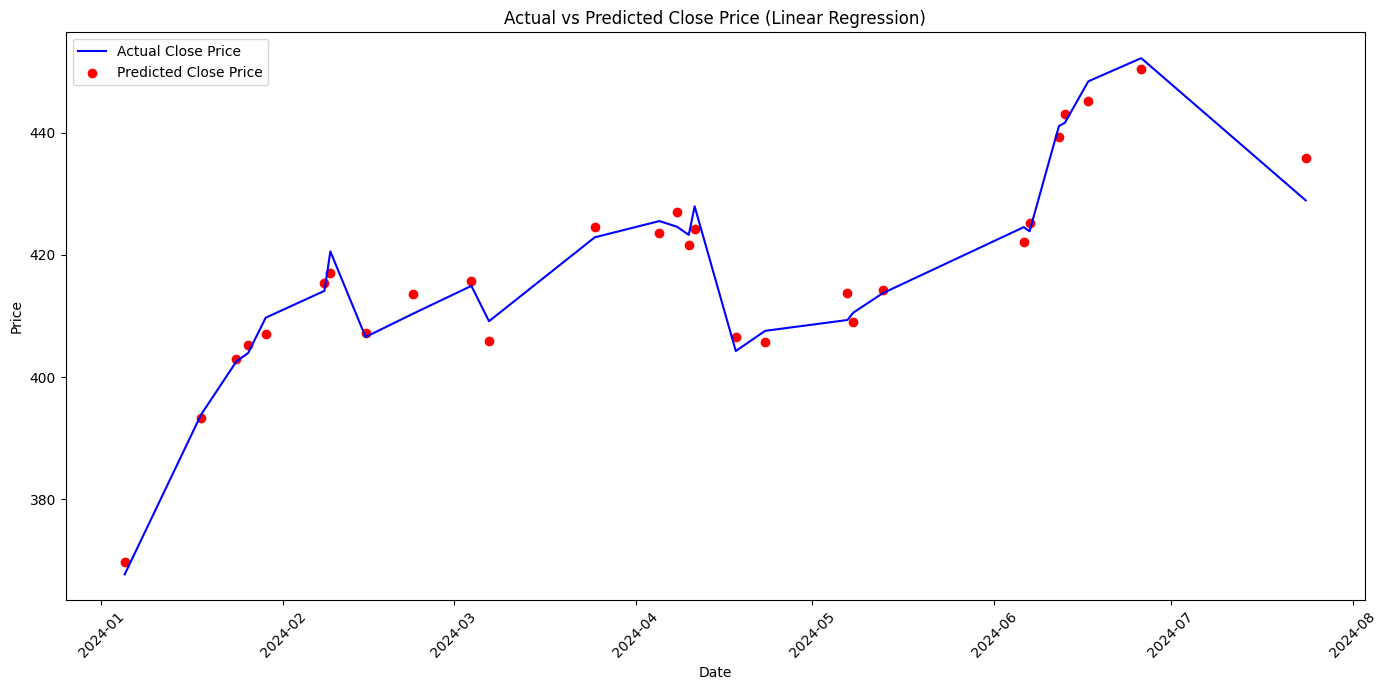

In [ ]:
# Create the results DataFrame. Get the date values based on the index of y_test
results_rf = pd.DataFrame({
    'Date': df.loc[y_test_rf.index, 'Date'].values, # Use .loc to ensure you get a 1D array
    'Actual': y_test_rf.values.flatten(), # Flatten y_test.values to ensure it's 1D
    'Predicted': y_pred_rf
})



# Sorting the results by Date for better visualization
results_rf = results_rf.sort_values('Date').reset_index(drop=True)

print(results_rf)

# Plotting the actual and predicted values
plt.figure(figsize=(14, 7))
plt.plot(results_rf['Date'], results_rf['Actual'], label='Actual Close Price', color='blue')
plt.scatter(results_rf['Date'], results_rf['Predicted'], label='Predicted Close Price', color='red')

# Adding titles and labels
plt.title('Actual vs Predicted Close Price (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Formatting the date axis for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()